In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

Here’s a striking example. Take MNIST. Create a new training set by concatenating 784 white-noise dimensions to the existing 784 dimensions of the data — so half of the data is now noise.

In [2]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

train_images_with_noise_channels = np.concatenate(
  [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11493376/11490434 [==============================] - 1s 0us/step


In [5]:
def get_model():
    model = keras.Sequential([
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer='rmsprop',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    return model

model = get_model()
hist = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

model = get_model()
hist_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
hist_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 0.4652 - accuracy: 0.8642 - val_loss: 0.1432 - val_accuracy: 0.9592
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1241 - accuracy: 0.9633 - val_loss: 0.1063 - val_accuracy: 0.9690
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0802 - accuracy: 0.9758 - val_loss: 0.0953 - val_accuracy: 0.9728
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0570 - accuracy: 0.9835 - val_loss: 0.0937 - val_accuracy: 0.9724
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0409 - accuracy: 0.9879 - val_loss: 0.0845 - val_accuracy: 0.9772
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0305 - accuracy: 0.9913 - val_loss: 0.0783 - val_accuracy: 0.9778
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0222 - accuracy: 0.9933 - val_loss: 0.0825 - val_accuracy: 0.9781
Epoch 

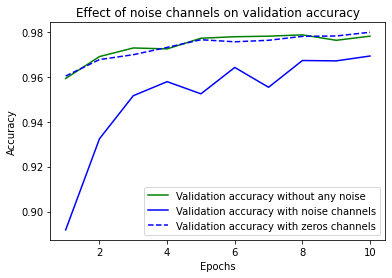

In [6]:
val_acc = hist.history["val_accuracy"]
val_acc_noise = hist_noise.history['val_accuracy']
val_acc_zeros = hist_zeros.history['val_accuracy']

epochs = range(1, 11)
plt.plot(epochs, val_acc, "g-", label="Validation accuracy without any noise")
plt.plot(epochs, val_acc_noise, 'b-', label='Validation accuracy with noise channels')
plt.plot(epochs, val_acc_zeros, 'b--', label='Validation accuracy with zeros channels')
plt.title('Effect of noise channels on validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [11]:
# can a bigger network help reduce noise?
model = keras.Sequential([
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

history = model.fit(train_images, train_labels, validation_split=0.2, batch_size=128, epochs=10)


Epoch 1/10
375/375 [==============================] - 4s 11ms/step - loss: 0.4814 - accuracy: 0.8445 - val_loss: 0.1362 - val_accuracy: 0.9591
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1048 - accuracy: 0.9677 - val_loss: 0.1039 - val_accuracy: 0.9709
Epoch 3/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0641 - accuracy: 0.9806 - val_loss: 0.0943 - val_accuracy: 0.9746
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0453 - accuracy: 0.9860 - val_loss: 0.1137 - val_accuracy: 0.9744
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0365 - accuracy: 0.9892 - val_loss: 0.1047 - val_accuracy: 0.9781
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0290 - accuracy: 0.9919 - val_loss: 0.1290 - val_accuracy: 0.9768
Epoch 7/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0251 - accuracy: 0.9924 - val_loss: 0.1392 - val_accuracy: 0.9762

In [13]:
# if a model is powerful enough it can learn on any data by just memorizing it
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 5ms/step - loss: 2.3341 - accuracy: 0.1052 - val_loss: 2.3067 - val_accuracy: 0.1006
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2975 - accuracy: 0.1223 - val_loss: 2.3110 - val_accuracy: 0.1027
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2878 - accuracy: 0.1324 - val_loss: 2.3220 - val_accuracy: 0.1001
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2723 - accuracy: 0.1432 - val_loss: 2.3269 - val_accuracy: 0.1019
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2548 - accuracy: 0.1571 - val_loss: 2.3443 - val_accuracy: 0.0983
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2323 - accuracy: 0.1725 - val_loss: 2.3486 - val_accuracy: 0.0974
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2077 - accuracy: 0.1871 - val_loss: 2.3638 - val_accuracy: 0.1029